# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

# Importing Libraries

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
train = pd.read_csv("bigdatamart_Train.csv")
test = pd.read_csv("bigdatamart_Test.csv")

Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

In [4]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


Observations:
- This shows that the train and test data is imported successfully.
- The train data consists of 8,523 training examples with 12 features.
- The test data consists of 5,681 training examples with 11 features

**Checking Missing Values**

One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [10]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Note that the Item_Outlet_Sales is the target variable and missing values are ones in the test set. So we need not worry about it. But we’ll impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.

**Finding some basic information about the features of the data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

**Numerical Features:**
- Item_Weight
- Item_Visibility
- Item_MRP
- Item_Outlet_Sales(Target Variable)

**Categorical Features**
- Item_Identifier
- Item_Fat_Content(Ordinal Feature)
- Item_Type
- Outlet_Itemtifier
- Outlet_Establishment_Year
- Outlet_Size(Ordinal Feature)
- Outlet__Location_Type(Ordinal Feature)
- Ootlet_Type(Ordinal Feature)

**Observations:**

There are 4 float type variables, 1 integer type and 7 object type.
We are considering Item_Establishment_Year as a categorical feature because it contains some fixed value but not converting its data type now will consider later.
Item_Fat_Content, Outlet_Size, Outelet_Location_Type and Outlet_Type are ordinal features because these values can be arranged in some order.

# UNIVARIATE ANALYSIS

**Univariate Analysis: Numerical Features**

In [9]:
print('No of observations: ', len(data),'\n')
data.describe()

No of observations:  14204 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Observations:**

- Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
- Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
- The ‘count’ of Item_Weight and Item_Outlet_Sales confirms the missing values in the dataset.

In [11]:
numerical = data.select_dtypes(include = ['int64', 'Int64','float64']).dtypes.index
numerical

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
def UVA_numeric(data, var_group, layout = None):
  '''
  data {dataframe}: the bulk data
  var_group {list}: list of variable to analyse
  layout{tuple}   : layout of visualisation (rows x columns)
  '''

  if layout == None:
    layout = (1,len(var_group))

  plt.figure(figsize = (layout[1]*10, layout[0]*10), dpi = 100)


  for j,i in enumerate(var_group):
    min = data[i].min()
    max = data[i].max()
    range = data[i].max() - data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    std_dev = data[i].std()
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()

    points = mean-std_dev, mean+std_dev

    #plotting of numeric features with all information.
    plt.subplot(layout[0],layout[1],j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'red', label = 'std_dev')
    sns.scatterplot([min,max], [0,0], color ='red', label = 'min/max')
    sns.scatterplot([mean], [0], color = 'blue', label = 'mean')
    sns.scatterplot([median], [0], color = 'green', label = 'median')
    plt.xlabel('{}'.format(i), fontsize = 20, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 16, fontweight = 'bold')
    plt.title('std_dev = {}; kurtosis = {};\n skew = {}; range = {};\n mean = {}; median = {}'.format
                                                                                              ((round(points[0],2), round(points[1],2)),
                                                                                               round(kurtosis,2), round(skew,2),
                                                                                               (round(min,2), round(max,2), round(range,2)),
                                                                                               round(mean,2),
                                                                                               round(median,2)))

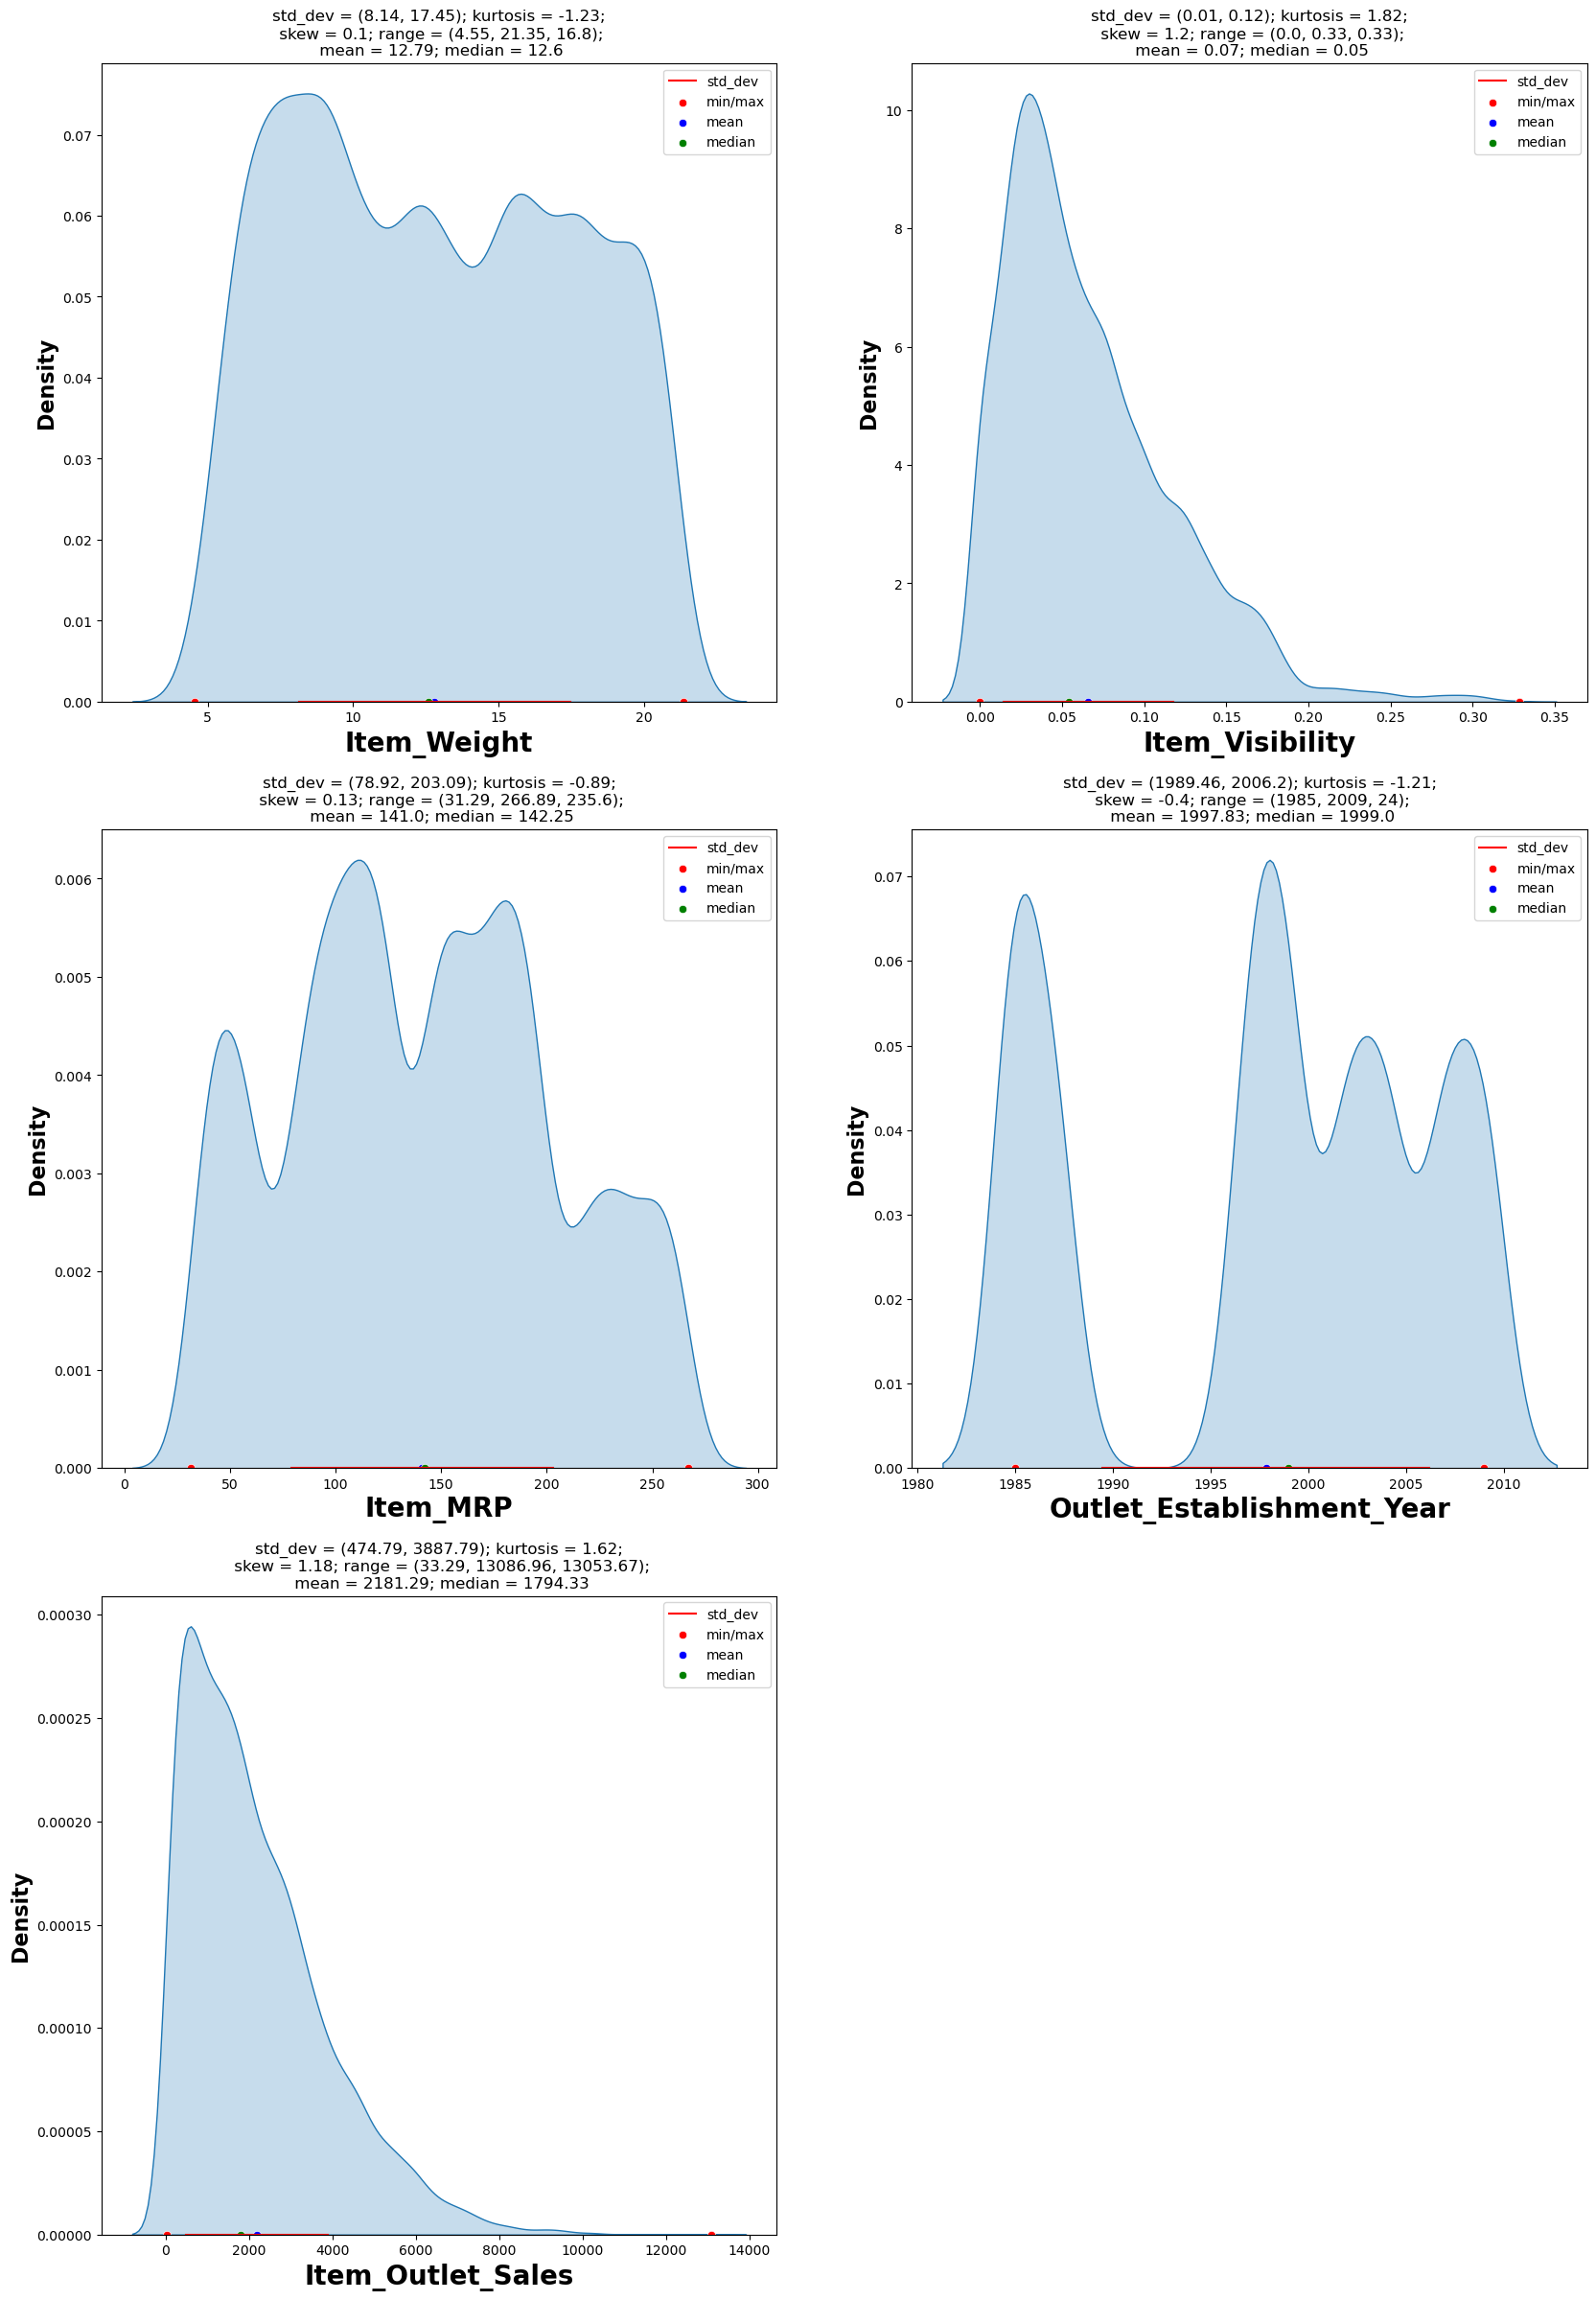

In [18]:
UVA_numeric(data, numerical, (3,2))

**Observation:**

- The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.
- There are some items that are not visible at all and the maximum visibility of the item is 33%.
- The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89.
- Most of the stores are established in year from 1985-1990 and 1995 to 2000.
- From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.
- Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000.

**Univariate Analysis: Categorical Features**

In this section we are going to explore analyze the categorical features, their classes and finding important information from the dataset.

In [19]:
cat_features = data.select_dtypes(include = ['object']).dtypes.index
cat_features

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [21]:
data['Item_Identifier'].value_counts()

FDK15    10
NCX05    10
FDI32    10
FDW16    10
DRI11    10
         ..
FDH58     7
FDM52     7
FDM10     7
DRN11     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [22]:
def UVA_Categorical(data, cat):
  plt.figure(figsize = (10,6))
  sns.countplot(cat, data = data)
  plt.xlabel(cat,fontsize = 14, fontweight = 'bold')
  plt.ylabel('Count',fontsize = 14, fontweight = 'bold')
  plt.title('Value counts: \n{}'.format(train[cat].value_counts(normalize = True)))

  # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)
  plt.show()

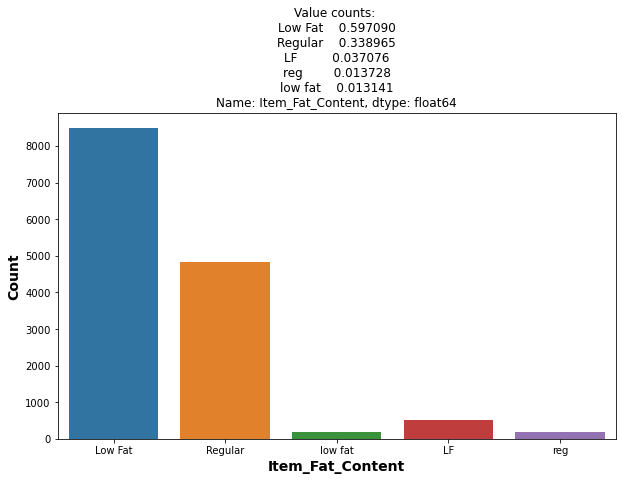

In [23]:
UVA_Categorical(data,'Item_Fat_Content')

**Observation:**
- Around 64% of the total items contains low fat while remaining contains regular fat.

**Inference:**
- Low Fat , low fat and lf are all seems to be same as Low Fat there later on we have to rename low fat and LF to Low Fat during preprocessing.
- Regular and reg also seems to same fat content, this also required to rename to Regular during preprocessing.

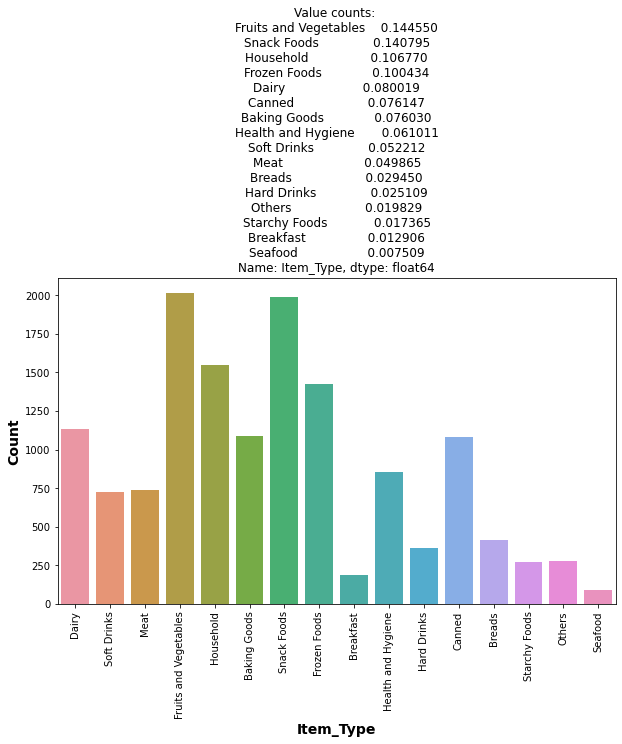

In [25]:
UVA_Categorical(data, 'Item_Type')

**Observations:**
- More than 14%(ie more than 1200 items) are fruits & vegetables and snacks and foods.
- Sale of breakfast and seafood type of items are very less.

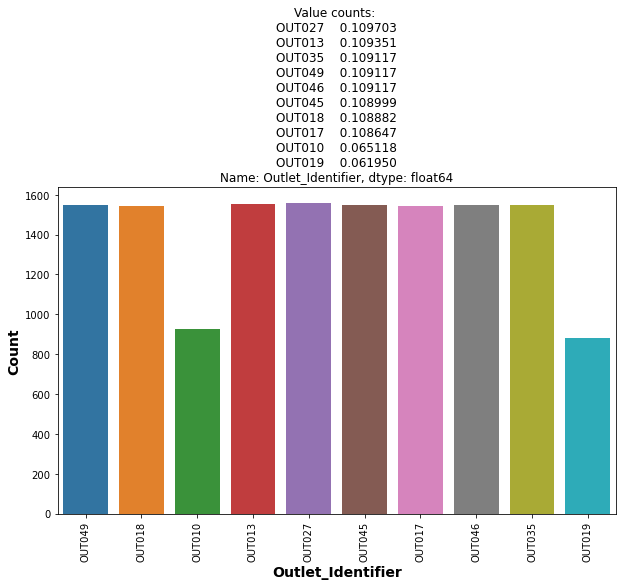

In [26]:
UVA_Categorical(data, 'Outlet_Identifier')

**Observations:**
- There are total 10 stores.
- All the stores are selling almost same number of items except the OUT010 and OUT019 stores

**Idea for Bivariate analysis**

Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.

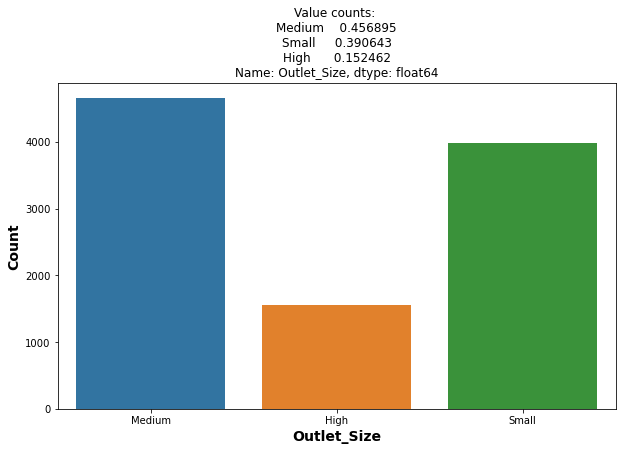

In [27]:
UVA_Categorical(data,'Outlet_Size')

Mostly items are sold from the medium store while very less count is being sold by high sized stores.

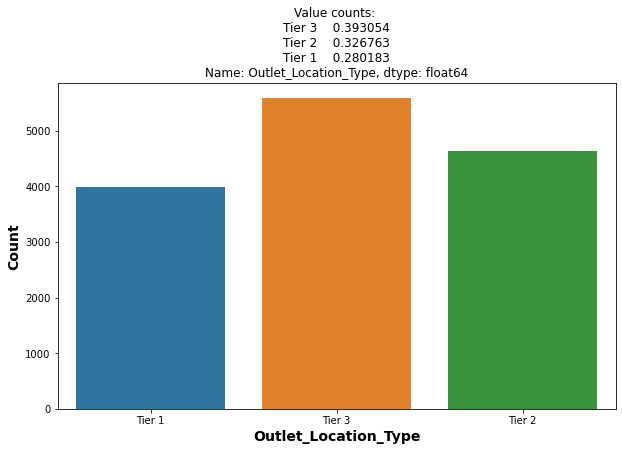

In [28]:
UVA_Categorical(data, 'Outlet_Location_Type')

**Observations:**

39% of the items sells from the stores laocated in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.

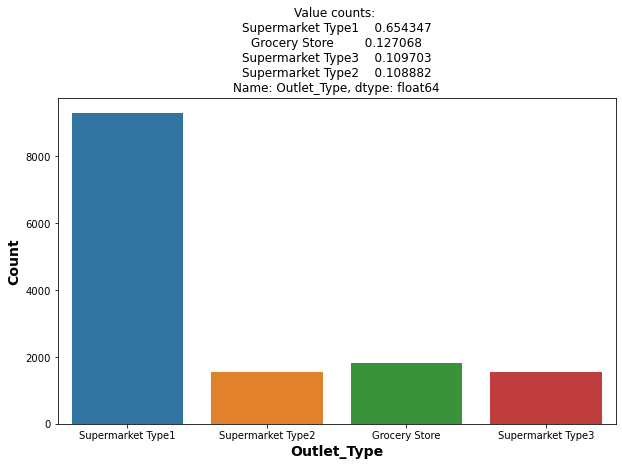

In [29]:
UVA_Categorical(data, 'Outlet_Type')

**Observations**

65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores.

Lets now calculate the percentage of missing values

In [30]:
def missing_percent():
  miss_item_weight = (data['Item_Weight'].isnull().sum()/len(data))*100
  miss_Outlet_Size = (data['Outlet_Size'].isnull().sum()/len(data))*100

  print('% of missing values in Item_Weight: ' + str(miss_item_weight))
  print('% of missing values in Outlet_Size: ' +str(miss_Outlet_Size))

In [31]:
missing_percent()

% of missing values in Item_Weight: 17.17121937482399
% of missing values in Outlet_Size: 28.273725711067303


**Observations:**

Since the percentage of missing values is not very high so we can't drop these values otherwise we can miss some important information. Only way is to handle the missing values using some technique.

# BIVARIATE ANALYSIS

**Bivariate Analysis: Numerical - Numerical**

In [32]:
numerical = data.select_dtypes(include = ['int64','float64','Int64'])
numerical.dtypes.index

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Correlation matrix using Pearson and Spearman correlation.

In [33]:
numerical.corr(method = 'pearson')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [34]:
numerical.corr(method='spearman')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017764,0.039206,0.000746,0.015062
Item_Visibility,-0.017764,1.000000,0.000559,-0.064129,-0.115076
Item_MRP,0.039206,0.000559,1.000000,0.000118,0.562986
Outlet_Establishment_Year,0.000746,-0.064129,0.000118,1.000000,0.042947
Item_Outlet_Sales,0.015062,-0.115076,0.562986,0.042947,1.000000


<AxesSubplot:>

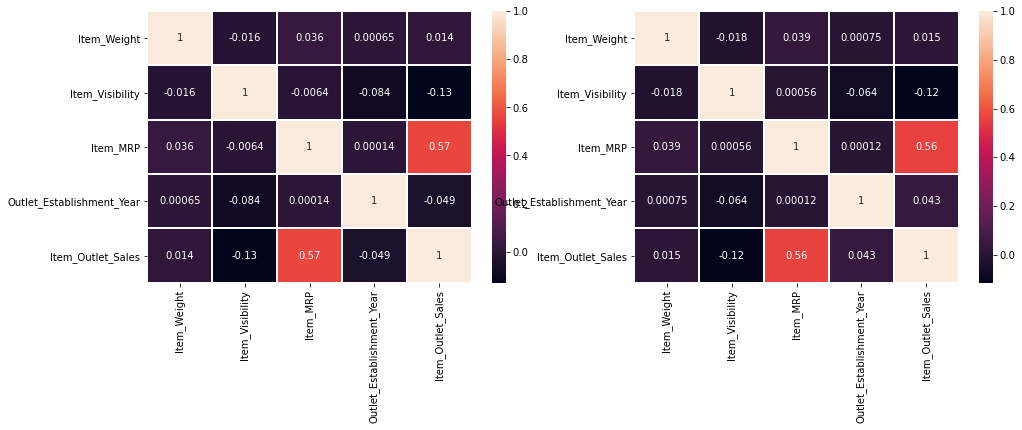

In [35]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.heatmap(numerical.corr(method = 'pearson'), cbar = True, annot = True,linewidths = 1)

plt.subplot(1,2,2)
sns.heatmap(numerical.corr(method = 'spearman'), cbar = True, annot = True,linewidths = 1)

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

In [36]:
corr_matrix=data.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

We can also observe that "Item_MRP" and "Outlet_Establishment" are more closely related with the target variable. They are having Positve and Negative coorelation respectively.

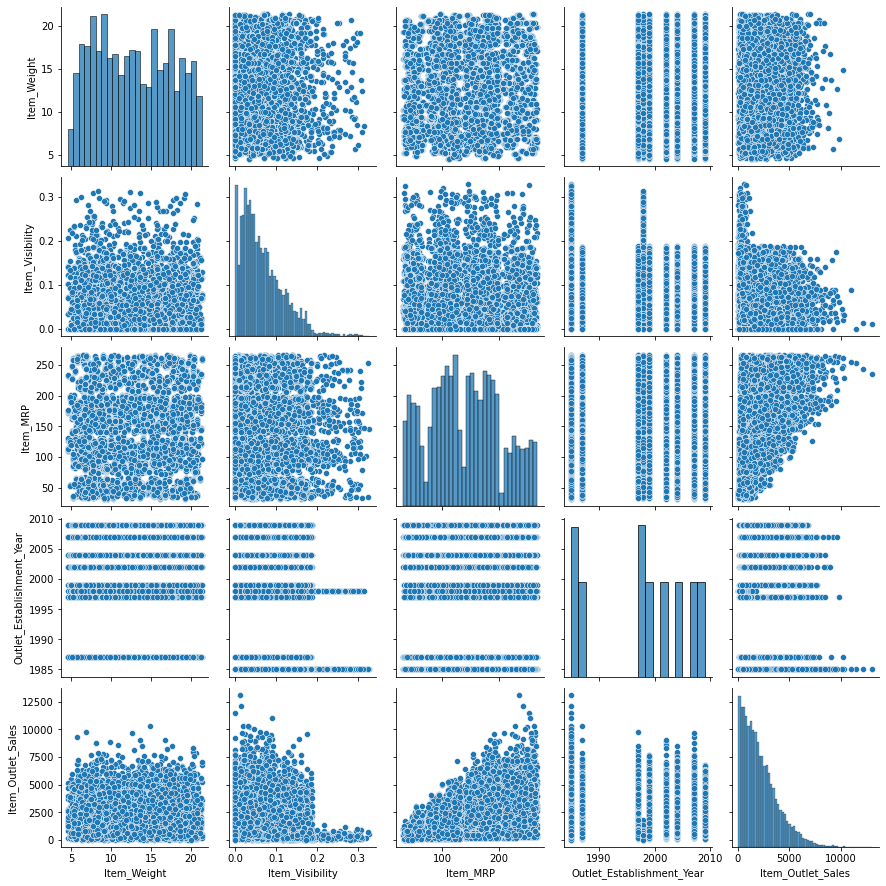

In [37]:
sns.pairplot(numerical)

**Observation:**
    
- Item_MRP is somewhat correlated with Item_Outlet_Sales. So Item_MRP can be important feature for predicting Item_Outlet_Sales at particular store.
- Increase in the item_visibility can decrease the item outlet sales because it is having negative correlation.
- Item weight and Item_Establishment_Year does not have any realationship with Item_Outlet_Sales.

**Bivariate Analysis - Numerical and Categorical**

In this we are going to analyze our data with one categorical feature and a target variable(numerical)

In [38]:
categorical = data.select_dtypes(include = 'object')
categorical.dtypes.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

**Anova test**

Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

The statistic which measures if the means of different samples are significantly different or not is called the F-Ratio. Lower the F-Ratio, more similar are the sample means. In that case, we cannot reject the null hypothesis.

F = Between group variability / Within group variability

In [39]:
def Bivariate_cont_cat(data, cont, cat, p_value, f_value, sign_level):

  # Checking hypothesis
  if p_value < sign_level and f_value > 1:
    sign = True
  else :
    sign = False

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  

  # Visualization
  plt.figure(figsize = (20,6),dpi = 120)
  

  # barplot
  plt.subplot(1,3,1)
  sns.barplot(x = cat, y = cont, data = data, hue = cat)
  plt.title('anova-test P value = {} \n anova_test F value = {} \n Significant difference = {} \n{}'.format(p_value, f_value, sign, table))
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)

  

  # Kdeplot
  #plt.subplot(1,3,2)
  #sns.kdeplot(x = cont, hue = cat, data = data,shade = True)
  #plt.title('Category Distribution', fontsize = 14, fontweight = 'bold')

  # Boxplot for checking Outliers
  plt.subplot(1,3,3)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot',fontsize = 14, fontweight = 'bold')
  
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)


In [41]:
df_anova = train[['Item_Outlet_Sales','Item_Fat_Content']]
grouped_anova = df_anova.groupby(['Item_Fat_Content'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Low Fat')['Item_Outlet_Sales'],grouped_anova.get_group('Regular')['Item_Outlet_Sales'],
                               grouped_anova.get_group('low fat')['Item_Outlet_Sales'], grouped_anova.get_group('LF')['Item_Outlet_Sales'],
                               grouped_anova.get_group('reg')['Item_Outlet_Sales'])
print(f_value, p_value)

1.7257091657385912 0.14122147854932424


We are using only train data in above code as 'Item_Outlet_Sales' is our target variable and it is missing in test data.

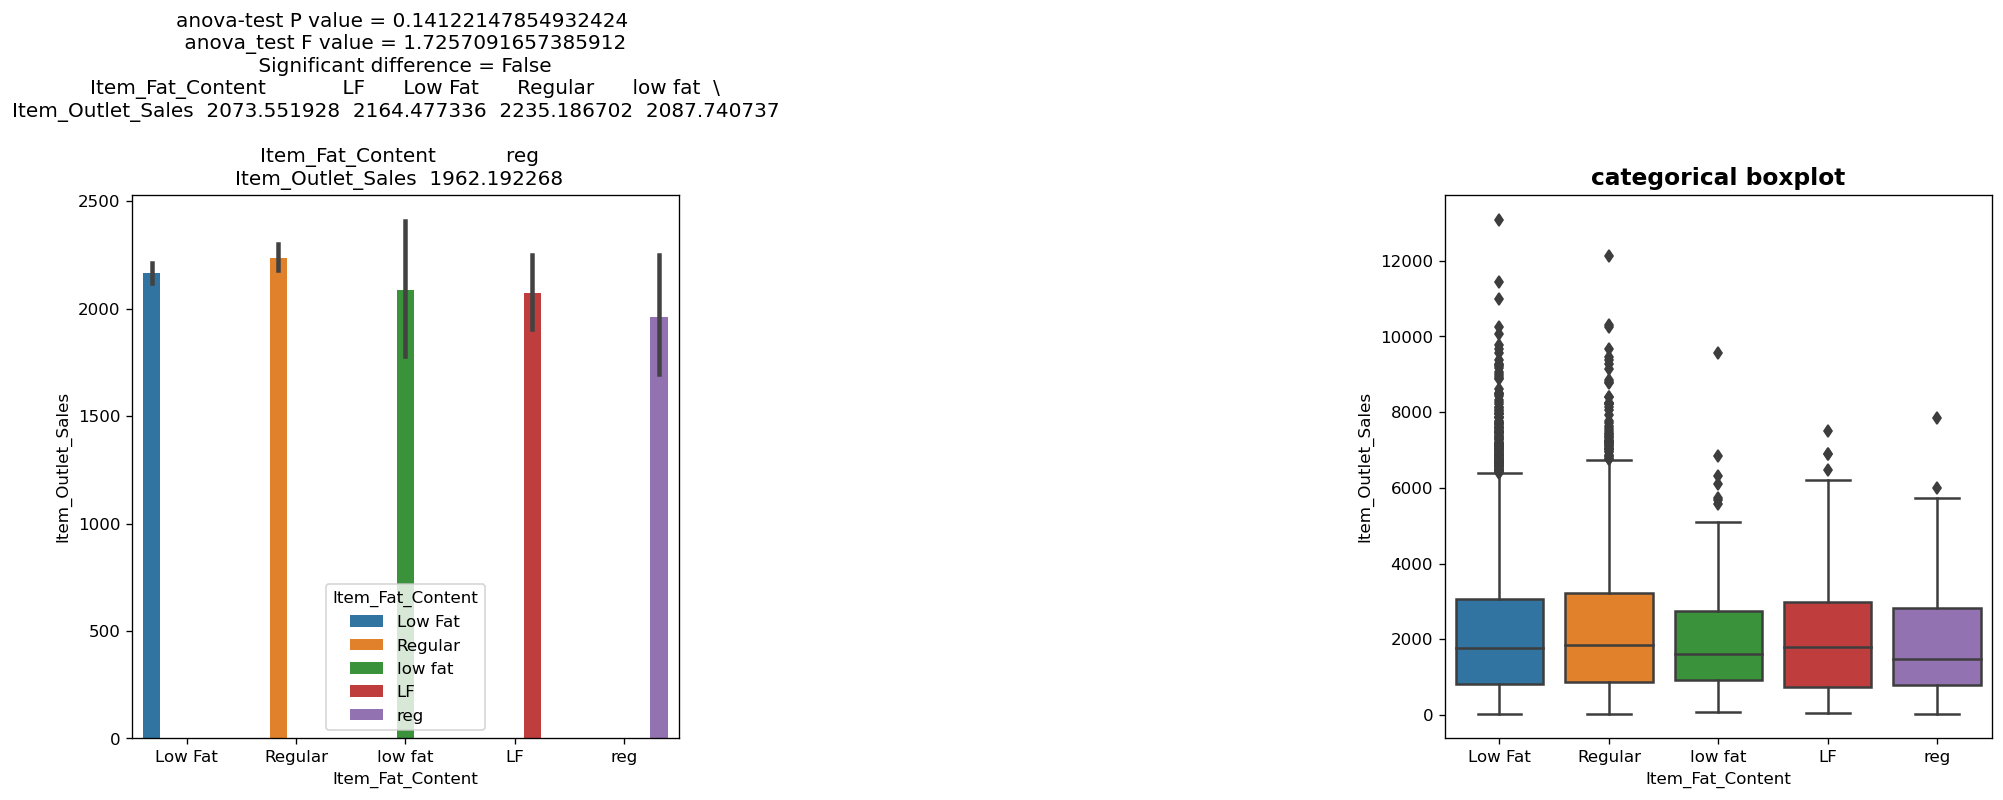

In [42]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Item_Fat_Content',p_value,f_value, 0.01)

**Observation:**

- There is no significance difference with the Item Fat Content. But there may be if be treat 'low fat' , 'LF' as 'Low Fat' and 'reg' as 'Regular'
- The distribution of Item Fat Content is slightly right skew.
- Outliers shown in the boxplot is due to much difference in the Item sales of different Items.

In [43]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [45]:
## Item Sales Vs Item Type

df_anova = train[['Item_Outlet_Sales','Item_Type']]
grouped_anova = df_anova.groupby(['Item_Type'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Dairy')['Item_Outlet_Sales'],grouped_anova.get_group('Soft Drinks')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Meat')['Item_Outlet_Sales'], grouped_anova.get_group('Fruits and Vegetables')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Baking Goods')['Item_Outlet_Sales'],grouped_anova.get_group('Frozen Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breakfast')['Item_Outlet_Sales'], grouped_anova.get_group('Health and Hygiene')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Hard Drinks')['Item_Outlet_Sales'], grouped_anova.get_group('Canned')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breads')['Item_Outlet_Sales'],grouped_anova.get_group('Starchy Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Others')['Item_Outlet_Sales'],grouped_anova.get_group('Seafood')['Item_Outlet_Sales'])
print(f_value, p_value)

2.5313222772815256 0.0017939203039080086


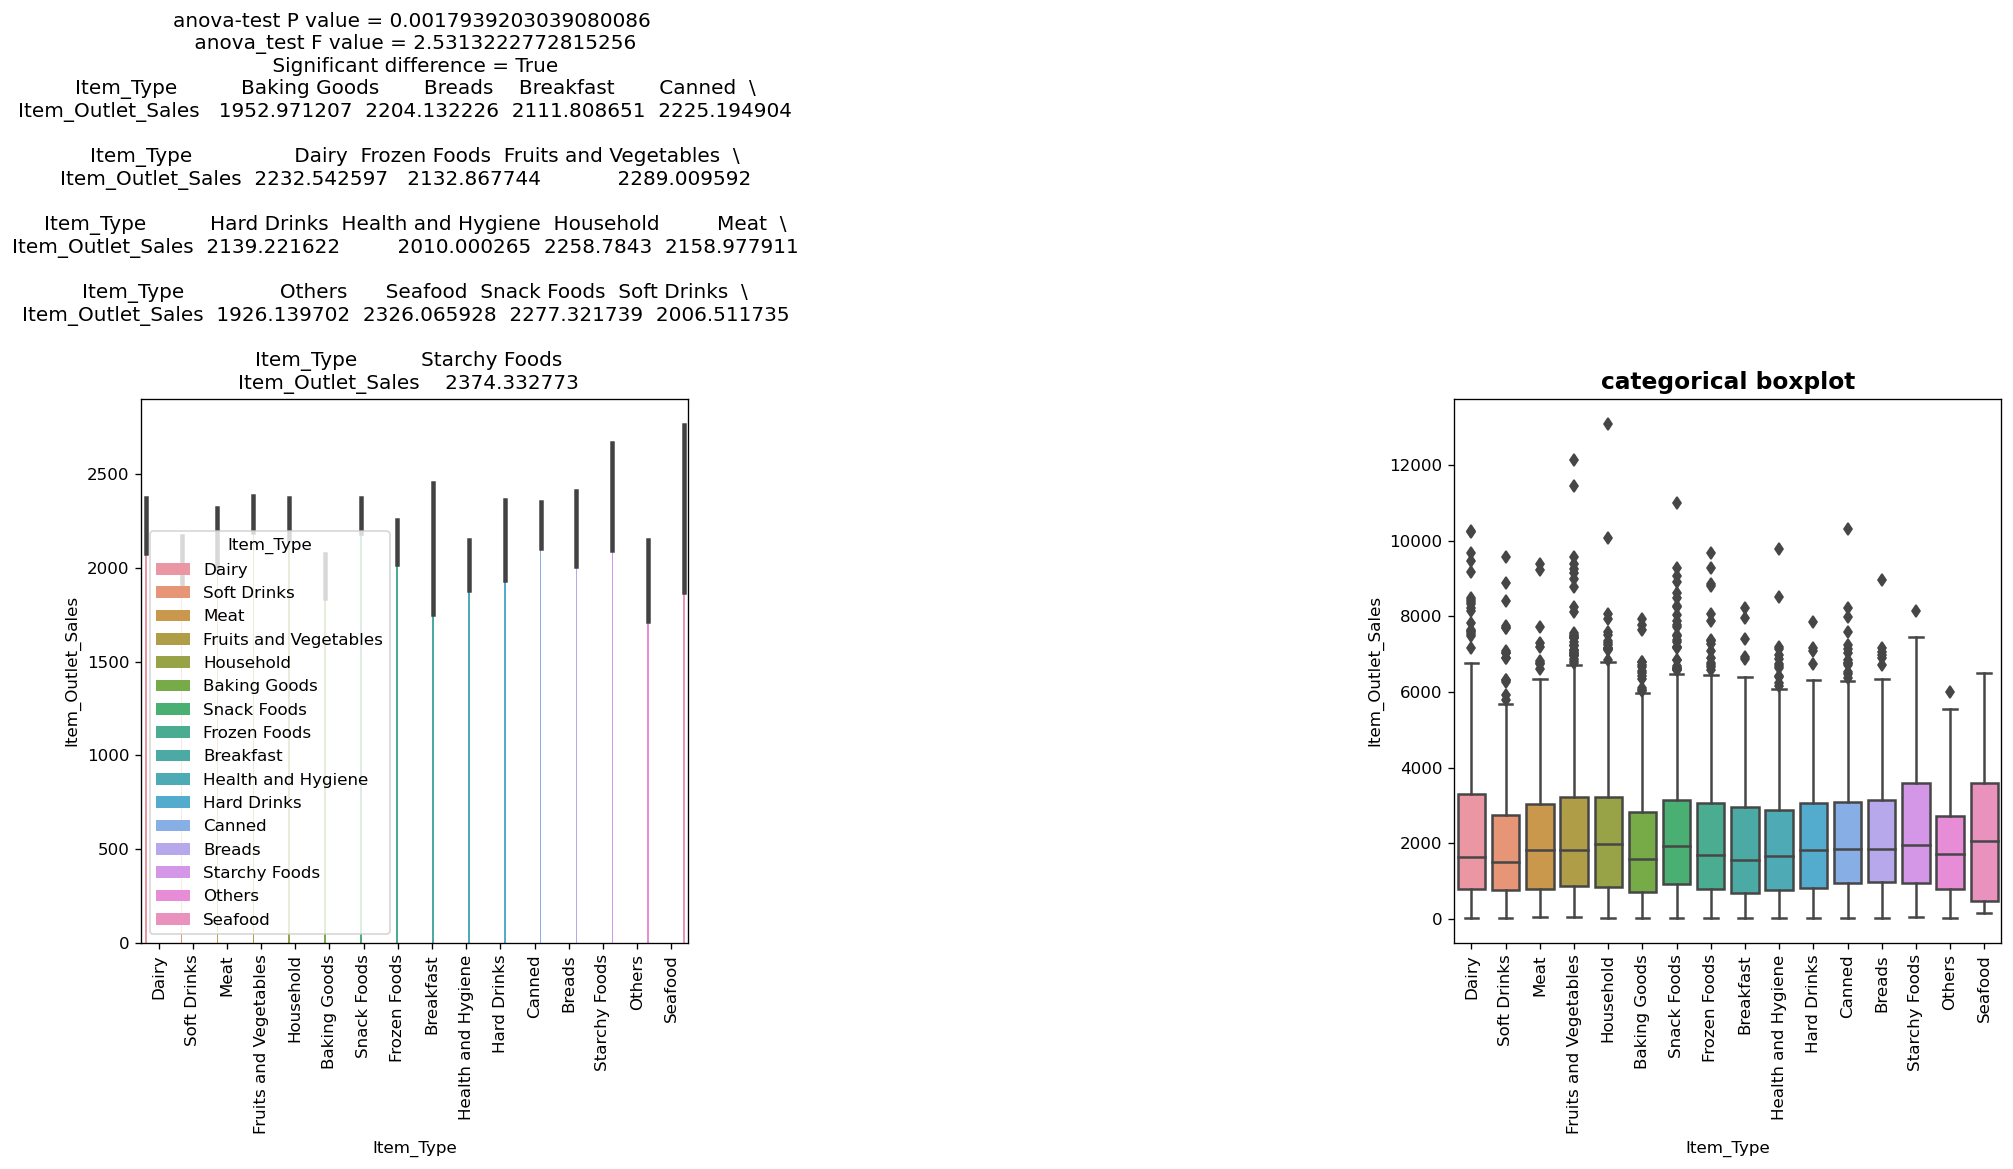

In [46]:
Bivariate_cont_cat(train, 'Item_Outlet_Sales','Item_Type',p_value, f_value, 0.05)

**Observation:**
    
- There is a significance difference between Item sales of different item types.
- Dairy products have the higher Item Outlet sales than others.

In [48]:
## Are the stores with medium size have high sale than others.

train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [49]:
df_anova = train[['Item_Outlet_Sales','Outlet_Size']]
grouped_anova = df_anova.groupby(['Outlet_Size'])
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Medium')['Item_Outlet_Sales'],grouped_anova.get_group('High')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Small')['Item_Outlet_Sales'])
print(f_value,p_value)

131.09669439861298 1.791274552101179e-56


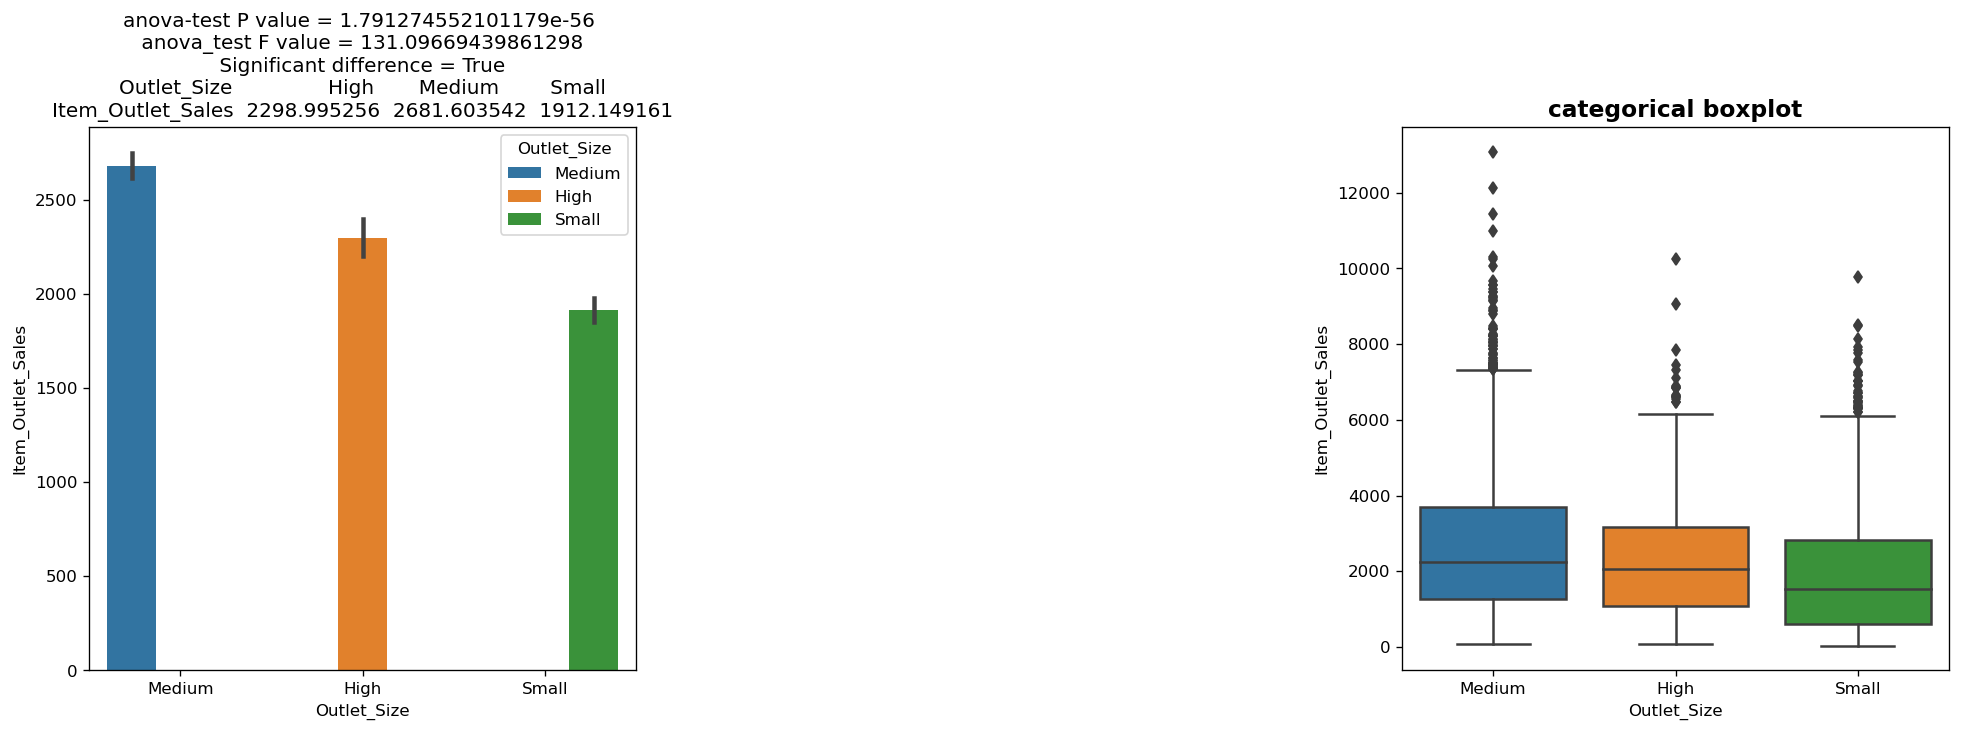

In [50]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Outlet_Size',p_value, f_value, sign_level = 0.05)

**Observation:**
- Yes there is a significance difference between Item Outlet Sales of stores with different Outlet Size.
- Medium size stores have more Item Outlet sales than others, while the small size stores have the least Item Outlet sales.
- Mean Item Outlet sales of the 'Medium' Outlet size is above 2500 while that of 'High' is below 2500 and 'Small' is of below 2000.

In [51]:
## Are the stores located in Tier 3 cities have more sales than other.

train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [52]:
df_anova = train[['Item_Outlet_Sales','Outlet_Location_Type']]
grouped_anova = df_anova.groupby('Outlet_Location_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Tier 1')['Item_Outlet_Sales'],grouped_anova.get_group('Tier 2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Tier 3')['Item_Outlet_Sales'])
print(f_value,p_value)

53.94773987456066 5.2228172988842975e-24


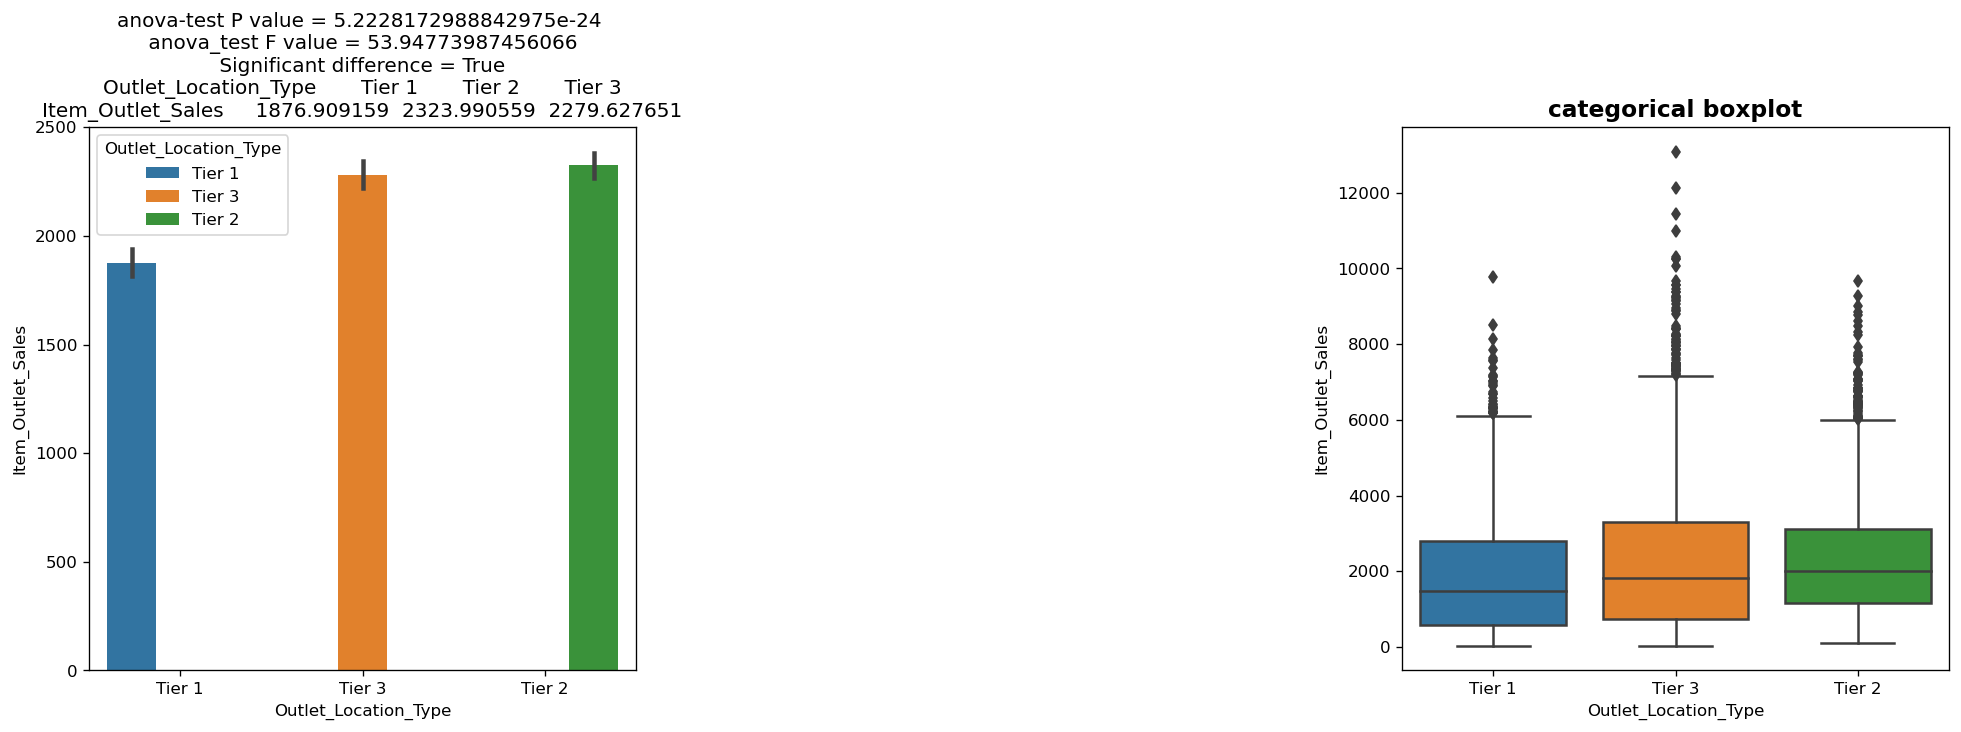

In [53]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Outlet_Location_Type', p_value, f_value, sign_level = 0.05)

**Observation:**
- There is a significance difference between the Item Outlet Sales of stores of different Outlet Location Type.
- Tier 2 cities have most sales while Tier 1 cities least sales.
- The average sale of Tier 2 cities is 2324 while that of Tier 2279.

In [54]:
## Are the Supermarket Type 1 type of stores have more sales than other type of stores.

train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [55]:
df_anova = train[['Item_Outlet_Sales','Outlet_Type']]
grouped_anova = df_anova.groupby('Outlet_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Supermarket Type1')['Item_Outlet_Sales'],grouped_anova.get_group('Supermarket Type2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Supermarket Type3')['Item_Outlet_Sales'])
print(f_value,p_value)

343.91819903375557 1.402711127727785e-143


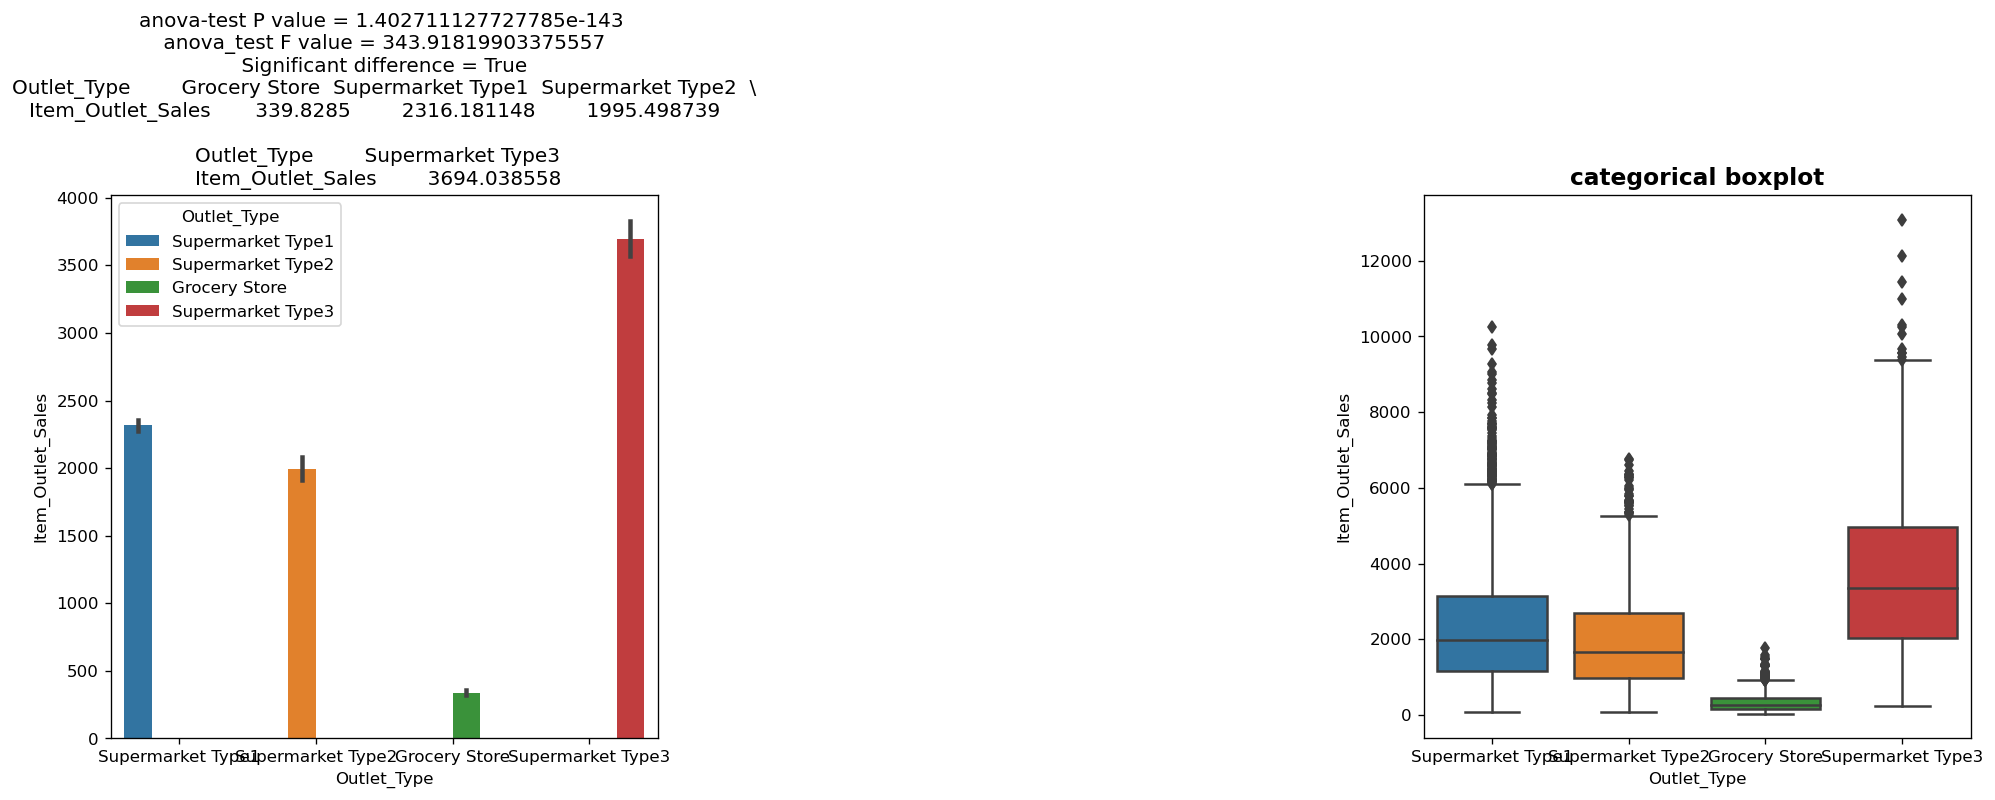

In [56]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Outlet_Type', p_value,f_value, sign_level=0.05)

**Observation:**
- There is a significance difference between the Item Outlet Sales of stores of different Outlet Type.
- No the supermarket Type 1 does not have the more sales than others
- Supermarket type 3 have more sales than others and the average sales of the Supermarket Type 3 is 3694.
- Grocery store has the least Item Outlet sales.

In [57]:
## Are the different stores affect the Item Outlet Sales.
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [58]:
df_anova = train[['Item_Outlet_Sales','Outlet_Identifier']]
grouped_anova = df_anova.groupby('Outlet_Identifier')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('OUT049')['Item_Outlet_Sales'],grouped_anova.get_group('OUT018')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT010')['Item_Outlet_Sales'],grouped_anova.get_group('OUT013')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT027')['Item_Outlet_Sales'],grouped_anova.get_group('OUT045')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT017')['Item_Outlet_Sales'],grouped_anova.get_group('OUT046')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT019')['Item_Outlet_Sales'],grouped_anova.get_group('OUT035')['Item_Outlet_Sales'])
print(f_value,p_value)

300.07913532849034 0.0


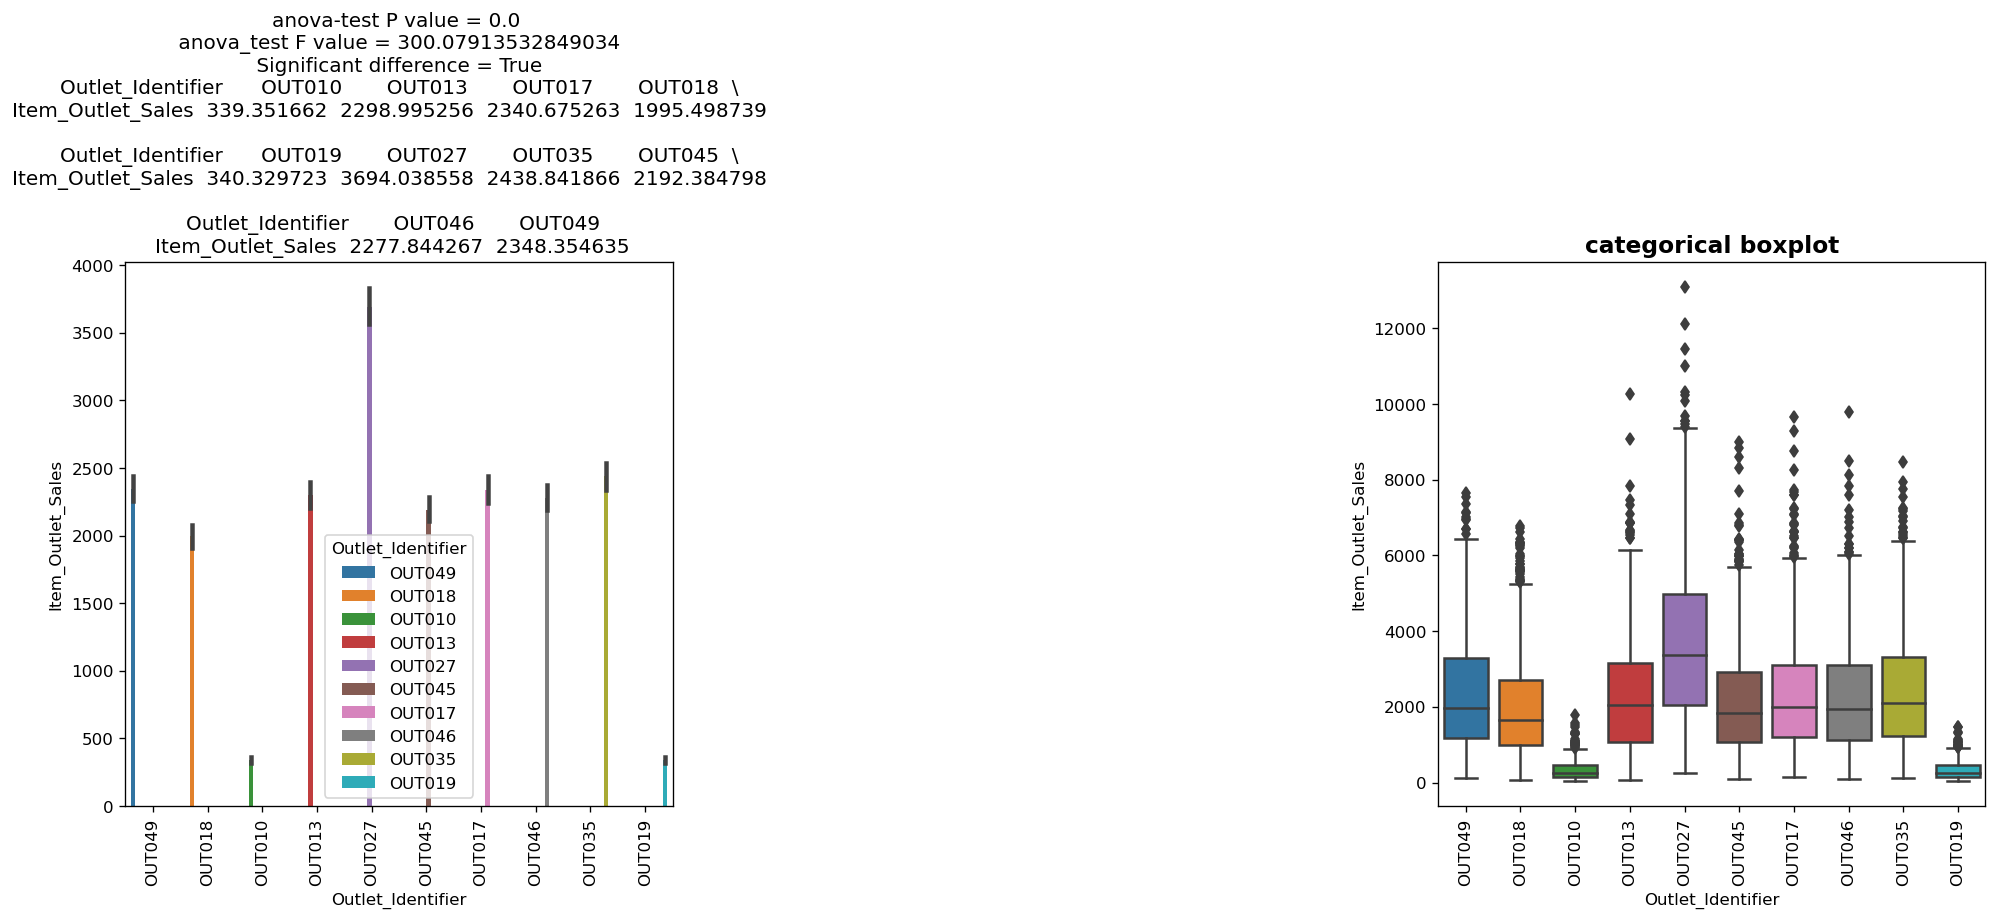

In [59]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Outlet_Identifier',p_value,f_value,sign_level = 0.05)

**Observation:**

- There is a significance difference on the Item Outlet Sales of different stores based on store Id i.e Outlet Identifier.
- Sales of OUT049 comes from the items whose average sales lies between 200-1000.

# DATA CLEANING

**Imputing missing values**

In [65]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)


                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [69]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [70]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


Impute Outlet size with mode

In [71]:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [72]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


# Feature Engineering

**Combine Outlet Type**

In [73]:
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


**Modify Item_Visibility**

We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [74]:
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [75]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


**Determine the years of operation of a store**

In [77]:
#this is 2013 sales data, so we are using 2013 as year for below calculation

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

**Create a broad category of Type of Item**

In [78]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

**Modify categories of Item Fat Content**

In [79]:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


**Mark non-consumables as seperate category in low fat**

In [80]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Feature Transformations

**Creating variable Item_Visibility_MeanRatio**

In [81]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

**Numerical and One-Hot Coding of Categorical variables**

Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.

Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.

In [82]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.

In [83]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

Lets look at the datatypes of columns now:

In [84]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [85]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


**Exporting Data**

Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code:

In [86]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Model Building

In [87]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

**Create a function which will be called in loop**

In [114]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
from sklearn.model_selection import cross_validate


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    global scr
    global cv_final
    global mae
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validate(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score['test_score']))
    cv_final=np.mean(cv_score)
    
    #Print model report:
    print("\nModel Report ", alg)
    scr=alg.score(dtrain[predictors], dtrain[target])
    print("Score ", scr)
    mae=np.sqrt(metrics.mean_absolute_error((dtrain[target]).values, dtrain_predictions))
    print("MAE : %.4g" % mae )
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [116]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

model_classify = [LinearRegression(normalize=True),Ridge(alpha=0.05,normalize=True),DecisionTreeRegressor(max_depth=15, min_samples_leaf=100),RandomForestRegressor()]
df=pd.DataFrame(columns=['Model','Accuracy','Cross Validation Score','MAE'])

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])


for model in model_classify:
    m = model
    test_string=str(m)+'.csv'
    modelfit(m, train_df, test_df, predictors, target, IDcol,test_string)
    df=df.append({'Model':test_string,'Accuracy':scr,'Cross Validation Score':cv_final, 'MAE':mae}, ignore_index=True)
    
print(df)


Model Report  LinearRegression(normalize=True)
Score  0.5635050926146872
MAE : 28.92
CV Score : Mean - 1129 | Std - 43.4 | Min - 1075 | Max - 1210

Model Report  Ridge(alpha=0.05, normalize=True)
Score  0.5625404650408208
MAE : 28.91
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217

Model Report  DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
Score  0.6157992263916037
MAE : 27.23
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186

Model Report  RandomForestRegressor()
Score  0.9383075694392577
MAE : 17.12
CV Score : Mean - 1130 | Std - 49.73 | Min - 1038 | Max - 1223
                                               Model  Accuracy  \
0               LinearRegression(normalize=True).csv  0.563505   
1              Ridge(alpha=0.05, normalize=True).csv  0.562540   
2  DecisionTreeRegressor(max_depth=15, min_sample...  0.615799   
3                        RandomForestRegressor().csv  0.938308   

   Cross Validation Score        MAE  
0             1128.

In [117]:
df

,Model,Accuracy,Cross Validation Score,MAE
0,LinearRegression(normalize=True).csv,0.563505,1128.815098,28.915606
1,"Ridge(alpha=0.05, normalize=True).csv",0.562540,1129.881611,28.914139
2,"DecisionTreeRegressor(max_depth=15, min_sample...",0.615799,1091.496893,27.232885
3,RandomForestRegressor().csv,0.938308,1130.179651,17.123033


**Observation**

We can see that the Random Forest Regressor has the highest accuracy with lowest value for Mean Squared Error. So this will be our best fit algorithm.

# Saving the best fit model


Model Report  RandomForestRegressor()
Score  0.9391717876891321
MAE : 17.1
CV Score : Mean - 1130 | Std - 48.95 | Min - 1038 | Max - 1211


<AxesSubplot:title={'center':'Feature Importances'}>

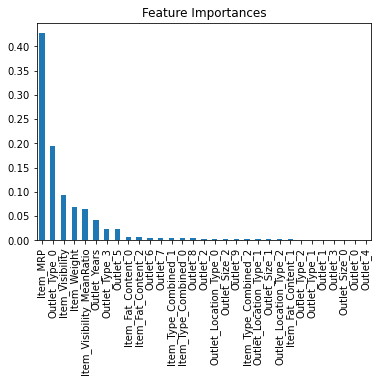

In [123]:
RF = RandomForestRegressor()
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
 'bootstrap': [True],
 'max_depth': [100,80],
 'max_features': [3,5,20],
 'min_samples_leaf': [3,5],
 'min_samples_split': [10,15,30],
 'n_estimators': [100,300,500]
}


GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
modelfit(GCV, train_df, test_df, predictors, target, IDcol, 'RF.csv')
GCV.best_params_ #printing the best parameters found by GridSearchCV

In [ ]:
#updating the model with best fit parameters
RF = RandomForestRegressor()
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

In [ ]:
#saving the model
import joblib
joblib.dump(RF,'Big_Mart_Sales.obj')